<a href="https://colab.research.google.com/github/dadhichvivek/ML-Project/blob/main/pubg_positioning_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pubg-finish-placement-prediction


Use the "Run" button to execute the code.

# 1. Data Reading and Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import numpy as np


In [2]:
# Train/test data Reading 

train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

print(train_df.shape,test_df.shape)

(99999, 29) (99999, 28)


In [3]:
# look at some of data points
train_df.sample(50000)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
42671,c1a2c4fe45c269,84535f0a257818,1ef8321085451c,0,4,147.10,0,0,2,13,0,2,1,192.900,1884,squad-fpp,30,30,1494,1,0.0,0,0.000,0,0,4870.0,5,0,0.9655
37895,e98706d2b33211,47b19eab99a9c9,fc4b05d6ff63de,0,2,0.00,0,0,0,45,0,0,0,0.000,1365,duo-fpp,48,47,1708,1,0.0,0,62.400,0,0,2704.0,7,0,0.9149
15135,5cedcbf05970bb,33abede0956004,9eef4e72f64d2f,0,2,542.50,4,1,1,8,0,4,1,4.938,1369,squad-fpp,32,32,1512,2,0.0,0,0.000,0,0,461.8,2,0,0.3548
75349,658c3dc1a01331,b631dc7af47ebd,98880b07b70377,0,2,58.57,0,0,2,52,1089,0,0,0.000,1392,solo-fpp,97,93,-1,0,0.0,0,0.000,0,0,1913.0,3,1535,0.7708
33938,1237e8cc2e377c,c6a9f491e7a86c,adb67b49e62877,0,0,0.00,0,0,1,73,0,0,0,0.000,1430,duo-fpp,50,48,1474,0,0.0,0,0.000,0,0,176.3,4,0,0.3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91707,d788f70cff10f1,ac5a439792926a,d8d5f9937a21da,0,3,253.40,2,0,9,5,1109,3,1,77.790,1349,squad,26,24,-1,0,0.0,0,0.000,0,0,2054.0,4,1534,1.0000
53831,6c5e154530b2e9,846e2f0661ca4c,5ecadadd3e5578,0,0,0.00,0,0,0,87,1121,0,0,0.000,1831,squad-fpp,30,28,-1,0,0.0,0,0.000,0,0,0.0,0,1545,0.0000
9368,7bf49e6fcc26cc,c7b2e911f32c50,27ca17fa08df8b,0,0,0.00,0,0,1,80,0,0,0,0.000,2017,solo,98,92,1635,0,0.0,0,0.000,0,0,385.0,4,0,0.2268
79709,775bd1c6368878,351eb2ff41f080,355133090b932f,0,0,57.20,1,0,0,95,1383,0,0,0.000,1794,squad-fpp,29,29,-1,0,0.0,0,0.000,0,0,171.5,3,1547,0.0357


In [4]:
test_df.head(50000)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.000,1884,squad-fpp,28,28,1500,0,0.0,0,0.00,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.900,1811,duo-fpp,48,47,1503,2,4669.0,0,0.00,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.000,1793,squad-fpp,28,27,1565,0,0.0,0,0.00,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.000,1834,duo-fpp,45,44,1465,0,0.0,0,0.00,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.060,1326,squad-fpp,28,27,1480,1,0.0,0,0.00,0,0,2963.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1910bafd437368,35bf2d6c847808,241126f183b105,0,1,262.20,2,1,3,22,0,2,1,6.284,1905,squad-fpp,28,25,1478,0,0.0,0,0.00,0,0,632.0,6,0
49996,30118f1ce8cdce,985d2bdb4d6107,3b6b100ef1075d,0,0,137.80,0,0,0,33,0,1,1,9.575,1974,solo-fpp,94,92,1536,0,0.0,0,0.00,0,0,1683.0,2,0
49997,8c0681297ba36b,d8a39faaa4c470,8b97e1c6fce9ce,0,0,0.00,0,0,0,42,0,0,0,0.000,1311,solo-fpp,92,88,1506,0,0.0,0,112.30,0,0,1571.0,6,0
49998,c2917ecb1f04b9,3fccc7a4dc7311,816c23ab876431,0,0,0.00,0,0,0,64,1000,0,0,0.000,1349,duo-fpp,47,46,-1,0,0.0,0,0.00,0,0,569.8,5,1500


In [5]:
# data description
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.233242,1.119341,130.661069,0.653727,0.222922,1.372894,47.597496,504.554176,0.923449,0.543635,22.582393,1578.638016,44.500115,43.006990,892.009780,0.162302,603.982737,0.003940,4.431636,0.023860,0.007590,1158.864186,3.674497,606.346213,0.473665
std,0.588477,1.724824,170.166789,1.143281,0.586714,2.669885,27.482887,626.861126,1.549018,0.712898,49.803850,259.032121,23.871920,23.334132,736.830411,0.461392,1490.636436,0.083694,29.088372,0.165865,0.090181,1185.515840,2.461656,739.522099,0.307768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.000000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.850000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1437.000000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,694.800000,3.000000,0.000000,0.461500
75%,0.000000,2.000000,185.900000,1.000000,0.000000,2.000000,71.000000,1170.000000,1.000000,1.000000,20.965000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.027750,0.000000,0.000000,0.000000,0.000000,1981.000000,5.000000,1495.000000,0.741900
max,13.000000,21.000000,3725.000000,32.000000,17.000000,47.000000,100.000000,2152.000000,35.000000,10.000000,953.600000,2218.000000,100.000000,100.000000,5580.000000,9.000000,28450.000000,6.000000,1220.000000,4.000000,4.000000,13530.000000,61.000000,1972.000000,1.000000


In [6]:
# data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               99999 non-null  object 
 1   groupId          99999 non-null  object 
 2   matchId          99999 non-null  object 
 3   assists          99999 non-null  int64  
 4   boosts           99999 non-null  int64  
 5   damageDealt      99999 non-null  float64
 6   DBNOs            99999 non-null  int64  
 7   headshotKills    99999 non-null  int64  
 8   heals            99999 non-null  int64  
 9   killPlace        99999 non-null  int64  
 10  killPoints       99999 non-null  int64  
 11  kills            99999 non-null  int64  
 12  killStreaks      99999 non-null  int64  
 13  longestKill      99999 non-null  float64
 14  matchDuration    99999 non-null  int64  
 15  matchType        99999 non-null  object 
 16  maxPlace         99999 non-null  int64  
 17  numGroups   

# EDA

correlation within the data

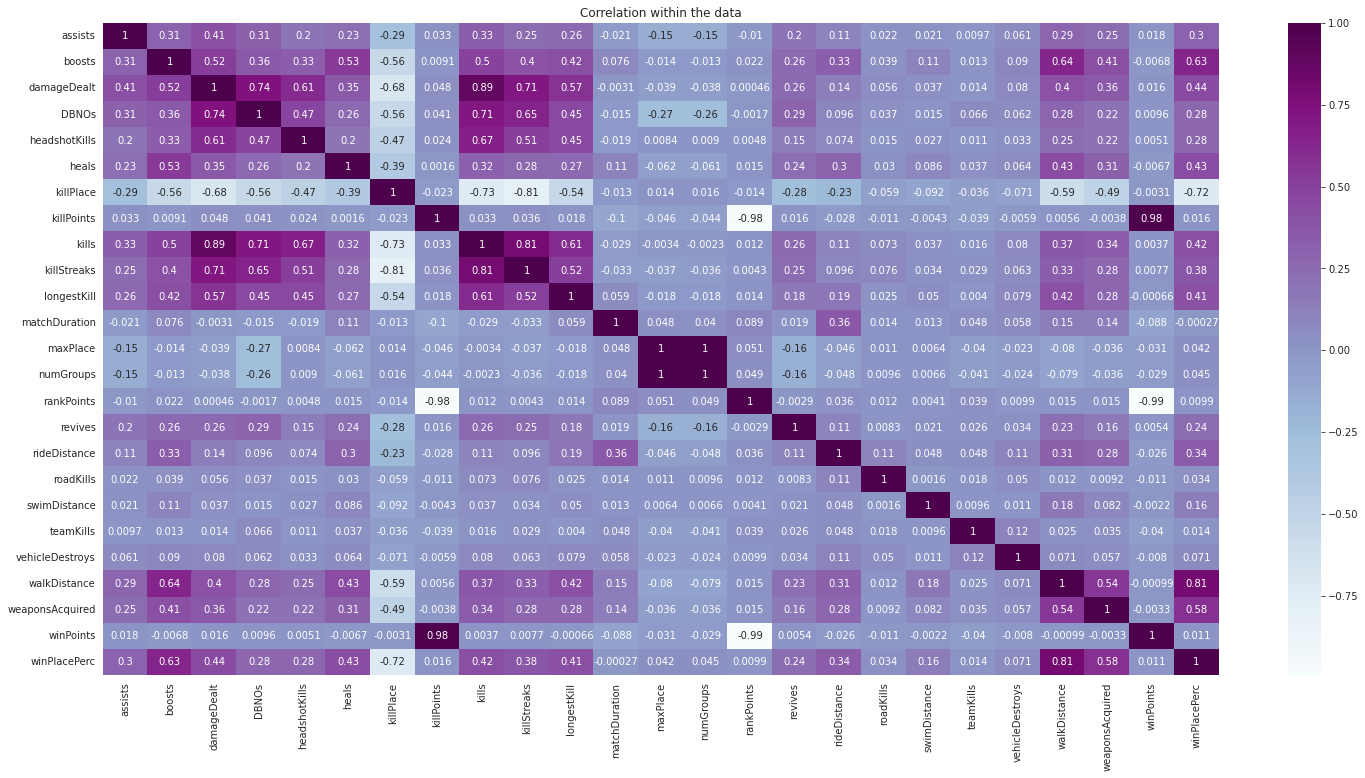

In [8]:
plt.figure(figsize=[25,12])
plt.title("Correlation within the data")
sns.heatmap(train_df.corr(),annot = True,cmap = "BuPu");

number of unique values for ID's

In [9]:
id_cols = train_df.columns[:3]

for i in id_cols:
  print(f" {i} : {train_df[i].nunique()}")

 Id : 99999
 groupId : 97542
 matchId : 41821


Assists v/s killpoints v/s kills v/s winpercentage

In [11]:
# taking a subset of data for plotting
exp_df = train_df.sample(30_000)

In [12]:
fig = px.scatter(exp_df, x = "assists", y = "kills",color="winPlacePerc", size="assists",hover_name="Id")
fig.show()

DamageDealt v/s heals v/s kills v/s winplacepercentage

In [13]:
fig = px.scatter(exp_df, y = "damageDealt", x = "heals", log_y= False, color = "kills", hover_name = "winPlacePerc", size = "damageDealt")
fig.show()

match duration v/s walk distance v/s swim distance

In [14]:
fig = px.scatter(exp_df, x = "matchDuration", y = "walkDistance",size = "swimDistance",
                 color = "revives",width=1200, hover_name = "winPoints")
fig.show()

Win percentage distribution

In [15]:
fig = px.histogram(exp_df,x = "winPlacePerc",color = "winPlacePerc")
fig.show()

# 2.Data Pre-Processing

In [74]:
# Dropping id columns for bot train/test

data_train = train_df.drop(columns = id_cols)
data_test = test_df.drop(columns = id_cols)

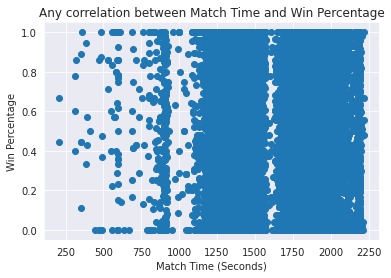

In [75]:
# does game length have any correlation with win percentage
import matplotlib.pyplot as plt

plt.scatter(x=train_df.iloc[:,14], y=train_df.iloc[:, 28])
plt.xlabel("Match Time (Seconds)")
plt.ylabel("Win Percentage")
plt.title("Any correlation between Match Time and Win Percentage")
plt.show()

In [17]:
data_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Checking for null-values

In [18]:
data_train.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [19]:
data_test.isna().sum().any()

False

In [20]:
# filling one missing with mean
data_train["winPlacePerc"] = data_train["winPlacePerc"].fillna(np.mean(data_train.winPlacePerc))

Encoding categorical data

In [21]:
data_train.matchType.value_counts()

squad-fpp           39668
duo-fpp             22368
squad               14101
solo-fpp            12130
duo                  6876
solo                 4088
normal-squad-fpp      364
crashfpp              151
normal-duo-fpp        125
flaretpp               40
normal-solo-fpp        40
normal-squad           19
flarefpp               17
crashtpp                6
normal-duo              4
normal-solo             2
Name: matchType, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
data_train["matchType"] = le.fit_transform(data_train["matchType"])
data_test["matchType"] = le.transform(data_test["matchType"])

Splitting target and datapoints

In [24]:
data = data_train.drop("winPlacePerc",axis = 1)
target = data_train["winPlacePerc"]

scaling numerical features

In [25]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()

In [26]:
data = sc.fit_transform(data)
data_test = sc.transform(data_test)

Spliting into train/test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test, y_train,y_test = train_test_split(data,target, random_state = 1234, test_size = 0.2)

print(x_train.shape, x_test.shape)

(79999, 25) (20000, 25)


# 3.Model


In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import time
import pickle

In [30]:
# define a pipeline to train a few models 
pipeline = {
      "LinearRegression" : make_pipeline(LinearRegression()),
      "RandomForestRegressor" : make_pipeline(RandomForestRegressor()),
}

In [31]:
# train the models on the trian data

fitted_models = {}

for algo,pipeline in pipeline.items():
  model = pipeline.fit(x_train[:50_000],y_train[:50_000])
  fitted_models[algo] = model


print("Finished training..")

Finished training..


In [32]:
fitted_models

{'LinearRegression': Pipeline(steps=[('linearregression', LinearRegression())]),
 'RandomForestRegressor': Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])}

In [33]:
# train score
for model in fitted_models:
  print(f" Score for {model} is {fitted_models[model].score(x_train[:10_000],y_train[:10_000])}")

 Score for LinearRegression is 0.8364269294030946
 Score for RandomForestRegressor is 0.9874552423566613


In [34]:
# test score
for model in fitted_models:
  print(f" Score for {model} is {fitted_models[model].score(x_test[:10_000],y_test[:10_000])}")

 Score for LinearRegression is 0.8302047947152367
 Score for RandomForestRegressor is 0.9132245788338169


Mean Absolute Error

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
pred_test = fitted_models["RandomForestRegressor"].predict(x_test[:10_000])
                                                       

In [37]:
print(f"{mean_absolute_error(pred_test,y_test[:10_000]):.4f}")

0.0638


In [38]:
# subset of the large data for hyperparameter tuning
x_train_small,x_test_small,y_train_small,y_test_small = x_train[:50_000],x_test[:30_000],y_train[:50_000],y_test[:30_000]

In [39]:
# function to tune an test the model
def train_and_eval(x_train,y_train,x_test,y_test, **params):
    model = RandomForestRegressor(random_state=42, n_jobs = -1, **params)
    model.fit(x_train,y_train)
    train_mae = mean_absolute_error(model.predict(x_train),y_train)
    test_mae = mean_absolute_error(model.predict(x_test),y_test)
    return model,train_mae,test_mae

In [40]:
# test 1
model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(n_jobs=-1, random_state=42),

 train_mae : 0.0238, test_mae : 0.0638



In [41]:
# test 2 
model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 30, max_depth = 10, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0618, test_mae : 0.0672



In [42]:
# test 3

model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 50, max_depth = 5, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=50,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0844, test_mae : 0.0847



In [43]:
# test 3

model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 150, max_depth = 15, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=150,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0417, test_mae : 0.0636



Making Predictions

In [44]:
model = RandomForestRegressor(n_estimators = 110, max_depth = 13, min_samples_leaf = 3)

Train

In [45]:
start = time.time()
model.fit(x_train,y_train)
end = time.time()

In [46]:
print(f"Finished training in {(end-start):.2f} seconds.")

Finished training in 57.56 seconds.


In [47]:
# saving this model

with open("Model_RF.pkl","wb") as f:
    pickle.dump(model,f)

train score

In [48]:
pred_train = model.predict(x_train)
print(mean_absolute_error(pred_train,y_train))

0.05133125950054536


Test Score

In [49]:
pred_test = model.predict(x_test)
print(mean_absolute_error(pred_test,y_test))

0.0633320315297835


Visualizations and weights

In [50]:
from sklearn.tree import plot_tree, export_text

In [51]:
model.estimators_[0]

DecisionTreeRegressor(max_depth=13, max_features='auto', min_samples_leaf=3,
                      random_state=1515201195)

In [52]:
model.estimators_[109]

DecisionTreeRegressor(max_depth=13, max_features='auto', min_samples_leaf=3,
                      random_state=2109584161)

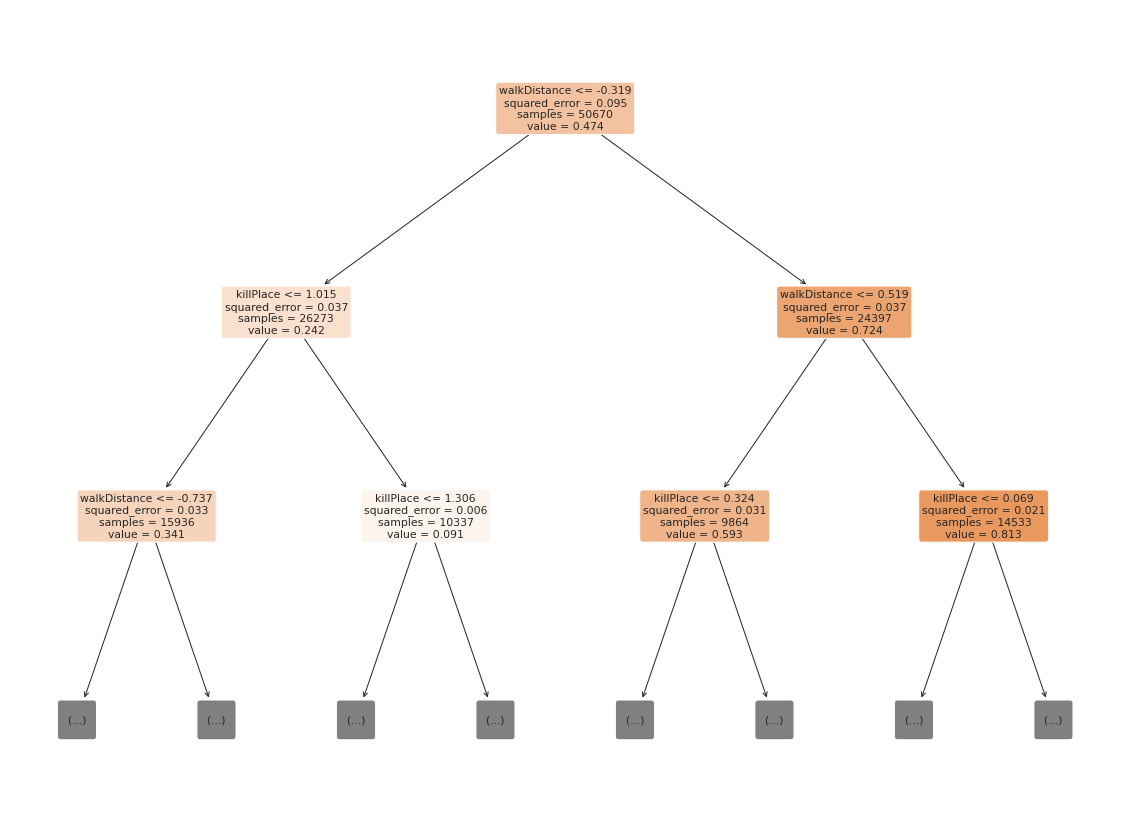

In [53]:
plt.figure(figsize = [20,15])
plot_tree(model.estimators_[0],max_depth = 2, feature_names=data_train.columns[:-1],filled = True,rounded = True);

Saving Importances

In [54]:
importance_df = pd.DataFrame({
    'feature': data_train.columns[:-1],
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [55]:
importance_df[:10]

,feature,importance
22,walkDistance,0.739946
6,killPlace,0.181531
14,numGroups,0.016698
11,matchDuration,0.013424
13,maxPlace,0.007876
17,rideDistance,0.005885
8,kills,0.005685
1,boosts,0.004503
10,longestKill,0.003835
9,killStreaks,0.003483


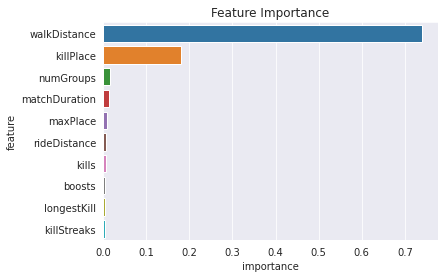

In [56]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Make predictions on test data and Submission

In [57]:
sample = pd.read_csv("sample_submission.csv")

In [58]:
sample.shape

(99999, 2)

In [59]:
pd.DataFrame(data_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.396351,-0.648963,-0.465434,-0.571801,-0.379952,-0.514217,0.924307,-0.804894,-0.596154,-0.762575,-0.453429,1.178863,0.779428,-0.691197,-0.643138,0.825147,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.481535,-1.086468,-0.819920
1,-0.396351,1.670126,0.284657,-0.571801,-0.379952,0.234883,-1.331653,-0.804894,0.694992,0.640157,6.813114,0.897044,-1.478637,0.146612,0.171124,0.829218,3.982962,2.727048,-0.047077,-0.152352,-0.143854,-0.084166,0.723854,0.944695,-0.819920
2,1.302959,-0.648963,-0.630332,-0.571801,-0.379952,0.983982,0.051032,-0.804894,-0.596154,-0.762575,-0.453429,0.827554,0.779428,-0.691197,-0.685994,0.913363,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.313000,0.132230,-0.819920
3,-0.396351,-0.648963,-0.382809,-0.571801,-0.379952,-0.514217,0.232964,-0.804894,-0.596154,-0.762575,-0.453429,0.985836,-1.478637,0.020940,0.042556,0.777646,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,0.550932,-0.274003,-0.819920
4,-0.396351,1.670126,1.172614,0.302878,3.028882,-0.139667,-1.477199,-0.804894,1.340566,0.640157,0.752508,-0.975320,0.779428,-0.691197,-0.685994,0.798003,1.815598,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,1.521823,0.132230,-0.819920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.396351,-0.648963,-0.767845,-0.571801,-0.379952,-0.514217,1.360945,-0.804894,-0.596154,-0.762575,-0.453429,-0.627871,0.779428,-0.649306,-0.600282,0.825147,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.948777,-1.492701,-0.819920
99995,-0.396351,-0.648963,-0.180183,0.302878,-0.379952,-0.514217,1.506491,1.388585,-0.596154,-0.762575,-0.453429,-0.689640,0.779428,-0.691197,-0.643138,-1.211967,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.890979,0.538463,1.277391
99996,1.302959,-0.648963,-0.020339,0.302878,1.324465,-0.139667,-1.076948,0.823864,0.694992,0.640157,0.192107,-0.550660,0.779428,-0.649306,-0.728850,-1.211967,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.741170,-0.274003,1.201666
99997,-0.396351,-0.648963,0.110122,-0.571801,-0.379952,-0.514217,0.123805,-0.804894,-0.596154,-0.762575,-0.453429,1.024442,0.779428,-0.649306,-0.643138,0.837361,-0.351767,-0.405186,-0.047077,-0.152352,-0.143854,-0.084166,-0.746568,-0.274003,-0.819920


In [60]:
predictions = model.predict(data_test)

In [61]:
predictions[:10]

array([0.26885615, 0.87661437, 0.71769693, 0.56825015, 0.92610162,
       0.01270806, 0.7159234 , 0.26896611, 0.57523716, 0.62802429])

In [62]:
sample["winPlacePerc"]=predictions

In [63]:
sample

,Id,winPlacePerc
0,9329eb41e215eb,0.268856
1,639bd0dcd7bda8,0.876614
2,63d5c8ef8dfe91,0.717697
3,cf5b81422591d1,0.568250
4,ee6a295187ba21,0.926102
...,...,...
99994,a339094d1ee286,0.079643
99995,b7461717920c77,0.073598
99996,266823d35adde0,0.319136
99997,bfdef8ade16b74,0.654719
